# torch classification 

In [4]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
%matplotlib inline

In [5]:
data = load_iris()

In [6]:
print(type(data))

<class 'sklearn.utils.Bunch'>


In [7]:
print(data.keys())

dict_keys(['feature_names', 'DESCR', 'data', 'target', 'filename', 'target_names'])


In [8]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [13]:
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


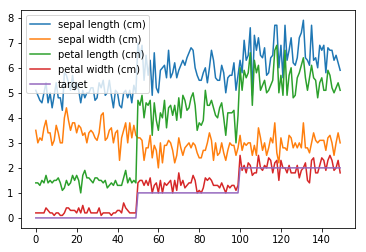

In [14]:
df.plot()

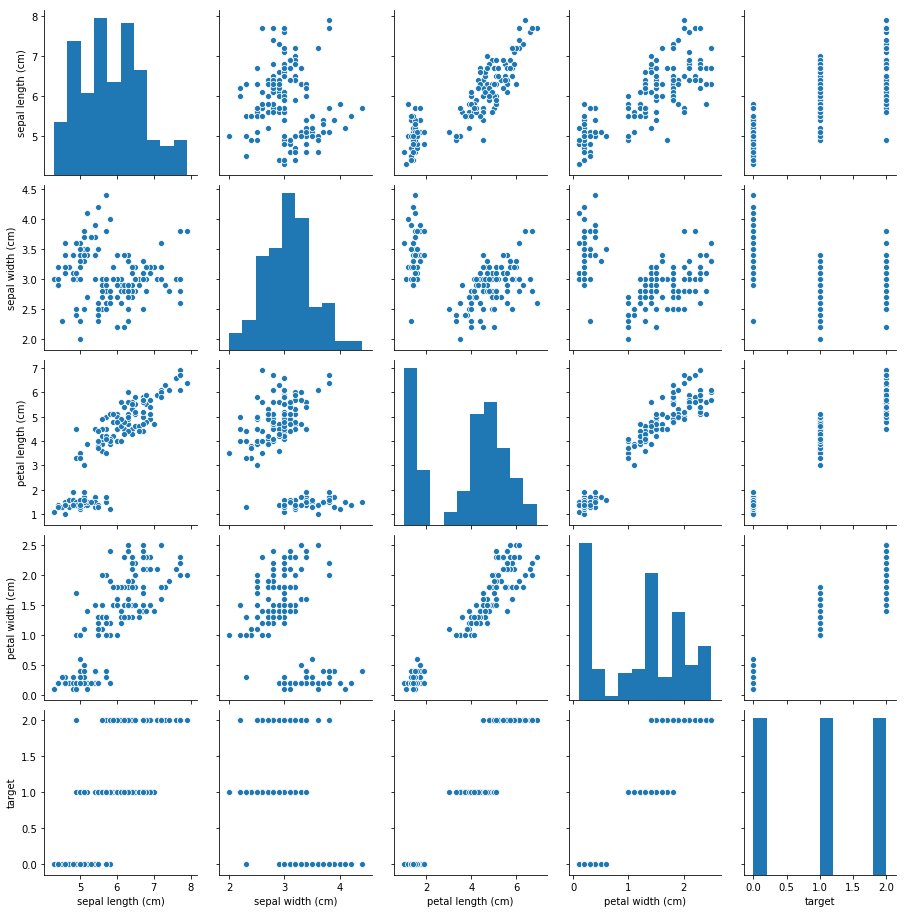

In [15]:
sns.pairplot(df)

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils

In [17]:
class IrisModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(IrisModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 16),
            nn.ReLU(),
            nn.Linear(16, output_size)
        )
        
    def forward(self, x):
        output = self.model(x)
        result = F.softmax(output, dim=1)
        with torch.no_grad():
            value = torch.argmax(result, dim=1)
        return result, value

In [18]:
X = torch.Tensor(data.data)
y = torch.LongTensor(data.target)

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # train과 test를 8:2로 분할

In [20]:
model = IrisModel(4, 3) # 입력은 4, 출력은 3종류의 확률

In [21]:
with torch.no_grad():
    y, _ = model(torch.unsqueeze(X_train[0], dim=0))
    print(y)
    print(y.sum())
    print(np.argmax(y), y_train[0])

tensor([[0.2748, 0.4312, 0.2940]])
tensor(1.)
tensor(1) tensor(0)


In [22]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [23]:
print(model)

IrisModel(
  (model): Sequential(
    (0): Linear(in_features=4, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=3, bias=True)
  )
)


In [24]:
model = IrisModel(4, 3) # 입력은 4, 출력은 3종류의 확률
optimizer = torch.optim.Adam(model.parameters(), lr=0.004)
criterion = nn.CrossEntropyLoss()

n_epochs = 10000 # 10000회 학습

for epoch in range(n_epochs):
    y, _ = model(X_train)
    target = y_train
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        print('epoch {}th loss: {}'.format(epoch, loss.data))

epoch 0th loss: 1.05965256690979
epoch 1000th loss: 0.5758278965950012
epoch 2000th loss: 0.5705928206443787
epoch 3000th loss: 0.5669400095939636
epoch 4000th loss: 0.5642128586769104
epoch 5000th loss: 0.5624411106109619
epoch 6000th loss: 0.5613586902618408
epoch 7000th loss: 0.560714602470398
epoch 8000th loss: 0.5603383779525757
epoch 9000th loss: 0.5601139068603516


In [25]:
n = 100
with torch.no_grad():
    y, _ = model(torch.unsqueeze(X_train[n], dim=0))
    print(y)
    print(y.sum())
    print(np.argmax(y), y_train[n])

tensor([[2.0636e-10, 1.0000e+00, 5.2890e-21]])
tensor(1.)
tensor(1) tensor(1)


In [26]:
model = IrisModel(4, 3) # 입력은 4, 출력은 3종류의 확률
optimizer = torch.optim.Adam(model.parameters(), lr=0.004)
criterion = nn.CrossEntropyLoss()

n_epochs = 10000 # 10000회 학습

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    model.train()
    y, _ = model(X_train)
    target = y_train
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        model.eval()
        y_pred, _ = model(X_test)
        test_loss = criterion(y_pred, y_test).sum()
        print('epoch {}th training loss: {} test loss: {}'.format(epoch, loss.data, test_loss.data))
        list_training_loss.append(loss.data)
        list_test_loss.append(test_loss.data)

epoch 0th training loss: 1.1322309970855713 test loss: 1.1307635307312012
epoch 1000th training loss: 0.5755814909934998 test loss: 0.5531481504440308
epoch 2000th training loss: 0.5699543356895447 test loss: 0.5518627762794495
epoch 3000th training loss: 0.5652415156364441 test loss: 0.5515260100364685
epoch 4000th training loss: 0.5620903372764587 test loss: 0.551465630531311
epoch 5000th training loss: 0.5607301592826843 test loss: 0.5514498353004456
epoch 6000th training loss: 0.5601828098297119 test loss: 0.551446259021759
epoch 7000th training loss: 0.5599341988563538 test loss: 0.5514454245567322
epoch 8000th training loss: 0.5598486661911011 test loss: 0.5514452457427979
epoch 9000th training loss: 0.5598124861717224 test loss: 0.5514453053474426


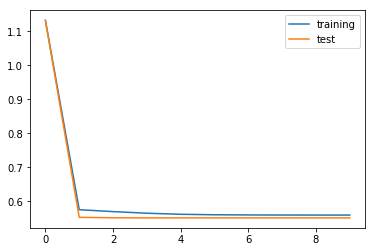

In [27]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import accuracy_score

with torch.no_grad():
    _ , y_pred = model(X_test)
    score = accuracy_score(y_test, y_pred)
    print(score)

1.0
